In [1]:
from tensorflow.python.client import device_lib

device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 2020883272319796631]

In [2]:
# import os
# os.environ["CUDA_VISIBLE_DEVICES"]='1'

# 1. 라이브러리 선언

In [3]:
import keras

Using TensorFlow backend.


In [4]:
import os
import cv2
import keras
# 케라스 모델 생성 라이브러리
from keras import models
# 레이어 생성 라이브러리 (Dense: 입출력 연결)
from keras import layers
# 케라스 샘플데이터[mnist] 라이브러리 불러오기
from keras.datasets import mnist
# numpy 라이브러리
import numpy as np
from numpy import array
# 케라스 카테고리 라이브러리
from keras.utils import to_categorical
#from sklearn.preprocessing import LabelEncoder
#from sklearn.preprocessing import OneHotEncoder
# 시각화 라이브러리
import matplotlib.pyplot as plt
%matplotlib inline

# 2. 데이터 불러오기

In [5]:
import cv2
import os
import numpy as np
from numpy import array
import matplotlib.pyplot as plt
%matplotlib inline

### 1. 훈련데이터 

In [6]:
TRAIN_DIR = '../images/mnist/trainingSet/'
train_folder_list = array(os.listdir(TRAIN_DIR))
train_folder_list

IMG_SIZE = 28
train_images=[]
train_labels=[]
for index in range(len(train_folder_list)):
    path = os.path.join(TRAIN_DIR, train_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        try:
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            train_images.append(new_img)
            train_labels.append(index)
        except:
            pass

In [7]:
array(train_images).shape

(42000, 28, 28)

In [8]:
import pandas as pd

In [9]:
testdf = pd.DataFrame(train_images[41999])

In [10]:
testdf.to_csv("./number.csv")

### 2. 테스트 데이터 

In [11]:
TEST_DIR = '../images/mnist/testSet/'
test_folder_list = array(os.listdir(TEST_DIR))
test_folder_list

test_images=[]
test_labels=[]
for index in range(len(test_folder_list)):
    path = os.path.join(TEST_DIR, test_folder_list[index])
    path = path + '/'
    img_list = os.listdir(path)
    for img in img_list:
        img_path = os.path.join(path, img)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        new_img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        test_images.append(new_img)
        test_labels.append(index)

### 3. 데이터셋 확인

In [12]:
train_images = array(train_images)
train_labels = array(train_labels)
test_images = array(test_images)
test_labels = array(test_labels)

In [13]:
print('Training data shape : ', train_images.shape, train_labels.shape)
print('Testing data shape : ', test_images.shape, test_labels.shape)

Training data shape :  (42000, 28, 28) (42000,)
Testing data shape :  (200, 28, 28) (200,)


In [14]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
 
# 훈련데이터의 답지분류 범위 정의
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'label : 2')

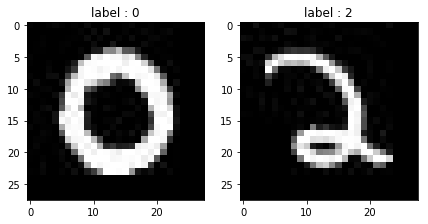

In [16]:
# 훈련/데이터 데이터 시각화
plt.figure(figsize=[7,5])
plt.subplot(121)
plt.imshow(train_images[0], cmap='gray')
plt.title("label : {}".format(train_labels[0]))
plt.subplot(122)
plt.imshow(test_images[42], cmap='gray')
plt.title("label : {}".format(test_labels[42]))

### 3-1. 이미지(28*28) 매트릭스 변환 (w,h,d)

In [17]:
train_images.shape

(42000, 28, 28)

In [18]:
train_data = train_images.reshape(len(train_images), IMG_SIZE,IMG_SIZE,1)
test_data = test_images.reshape(len(test_images), IMG_SIZE,IMG_SIZE,1)

In [19]:
train_images.shape

(42000, 28, 28)

In [20]:
train_data.shape

(42000, 28, 28, 1)

In [21]:
train_images[0][1]

array([ 0,  0,  0,  0,  0,  0,  0,  1,  5,  0, 12,  0, 16,  0,  0,  4,  0,
        2,  8,  3,  0,  4,  8,  0,  0,  0,  0,  0], dtype=uint8)

### 3-2. float 타입변환 및 정규화

In [22]:
train_data = train_data.astype('float')
test_data = test_data.astype('float')

train_data /= 255
test_data /= 255

### 3-3. 답지 분류형으로 변환

In [23]:
from keras.utils import to_categorical

In [24]:
# Change the labels from integer to categorical data
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)
 
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[10000])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[10000])

Original label 0 :  2
After conversion to categorical ( one-hot ) :  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [25]:
from numpy import argmax

In [26]:
argmax(train_labels_one_hot[10000])

2

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
trainingData_features,\
validData_features,\
trainingData_label,\
validData_label=\
train_test_split(train_data, 
                 train_labels_one_hot, 
                 test_size = 0.2, 
                 random_state=20)

In [29]:
# from sklearn.preprocessing import OneHotEncoder
# oe_label = OneHotEncoder()

# train_labels_t = train_labels.reshape(-1,1)
# test_labels_t = test_labels.reshape(-1,1)
# oe_label.fit(train_labels_t)
# train_labels_one_hot = oe_label.transform(train_labels_t).toarray()
# test_labels_one_hot = oe_label.transform(test_labels_t).toarray()

In [30]:
# Display the change for category label using one-hot encoding
print('Original label 0 : ', train_labels[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  0
After conversion to categorical ( one-hot ) :  [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


# 4. 케라스 모델 정의

In [31]:
import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout

In [32]:
# 입력데이터 형태
modelDim = trainingData_features[0].shape

# 층 누적 기본형태
model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))
model.add(Dense(8, activation='relu'))
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


In [33]:
modelDim

(28, 28, 1)

In [34]:
# 입력데이터 형태
modelDim = trainingData_features[0].shape
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same',
                 activation='relu',
                 input_shape=modelDim))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1000)            

In [35]:
# # 모델 시각화
# from keras.utils import plot_model
# plot_model(model, to_file='model_plot.png', 
#            show_shapes=True, 
#            show_layer_names=True)
# from IPython.display import Image
# Image(retina=True, filename='model_plot.png')

# 5. 케라스모델 훈련방법 설정

In [36]:
# Sequatial 방싱 케라스모델
# 손실함수(LOSS): 훈련동안 최소화될 값 지표 (mse, categorical_crossentropy)
# 손실함수를 기반으로 Neural Net 업데이터 결정 (mse, mae, accuracy)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

# 6. 모델 훈련

In [37]:
# from tensorflow.python.client import device_lib
# print(device_lib.list_local_devices())

In [38]:
import timeit
start = timeit.default_timer()

# 실행 코드

stop = timeit.default_timer()
print("총 소요시간: ", stop - start)

총 소요시간:  5.8534000004328846e-05


In [39]:
if 'session' in locals() and session is not None:
    print('Close interactive session')
    session.close()

In [40]:
from datetime import datetime
now = datetime.now()
date = now.strftime("%Y-%m-%d_%H%M")
save_dir = "./logs_{}".format(date)

callbacks = [
    
    keras.callbacks.TensorBoard(
    log_dir = save_dir,
    write_graph=True,
    write_images=True)
    ,  
    keras.callbacks.EarlyStopping(
    monitor = 'val_acc', patience=10,
    )
]

# 모델을 32개의 샘플씩 미니 배치를 만들어 20번의 에포크 동안 훈련
history = model.fit(trainingData_features, trainingData_label, 
                    validation_data=(validData_features,validData_label),
                    batch_size=32,
                    epochs=10,
                    callbacks = callbacks)


Train on 33600 samples, validate on 8400 samples


Epoch 1/10
33600/33600 [==============================] - 103s 3ms/step - loss: 0.1787 - accuracy: 0.9432 - val_loss: 0.0903 - val_accuracy: 0.9733

Epoch 2/10
   32/33600 [..............................] - ETA: 1:17 - loss: 0.0578 - accuracy: 0.96

C:\Users\kopo\AppData\Local\Continuum\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


33600/33600 [==============================] - 104s 3ms/step - loss: 0.0645 - accuracy: 0.9791 - val_loss: 0.0681 - val_accuracy: 0.9800
Epoch 3/10
33600/33600 [==============================] - 105s 3ms/step - loss: 0.0482 - accuracy: 0.9848 - val_loss: 0.0561 - val_accuracy: 0.9844
Epoch 4/10
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0411 - accuracy: 0.9862 - val_loss: 0.0541 - val_accuracy: 0.9850
Epoch 5/10
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0356 - accuracy: 0.9883 - val_loss: 0.0409 - val_accuracy: 0.9877
Epoch 6/10
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0394 - val_accuracy: 0.9888
Epoch 7/10
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0228 - accuracy: 0.9927 - val_loss: 0.0553 - val_accuracy: 0.9856
Epoch 8/10
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0257 - accuracy: 0.9914 - val_loss: 0.051

In [41]:
import pandas as pd

In [42]:
pd.DataFrame(history.history).tail(5)

,val_loss,val_accuracy,loss,accuracy
5,0.039448,0.988810,0.028321,0.991250
6,0.055274,0.985595,0.022775,0.992679
7,0.051082,0.986667,0.025709,0.991429
8,0.052304,0.988095,0.019815,0.993571
9,0.050284,0.988095,0.020539,0.993095


# 7. 모델 추론

In [43]:
# verbose: 정보표시 레벨 (0,1)
test_loss, test_acc = model.evaluate(test_data, 
                                     test_labels_one_hot)
print(test_loss, test_acc)


200/200 [==============================] - 0s 495us/step
0.08547249073661078 0.9900000095367432


# 8. 훈련내용 확인하기 (Tensorboard)

# 9. 예측 및 비교

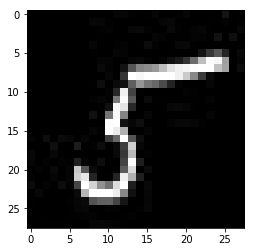

In [44]:
prd_images = []
imgpah="../images/mnist/testSet/5/img_24.jpg"
img = cv2.imread(imgpah, cv2.IMREAD_GRAYSCALE)
prd_images.append(img)
prd_images=array(prd_images)

plt.imshow(img, cmap="gray")

In [45]:
test_data = prd_images.reshape(len(prd_images) , IMG_SIZE, IMG_SIZE,1)
test_data = test_data.astype('float')
test_data /= 255

In [46]:
# Predict the most likely class
label_pred = model.predict(test_data[[0],:])

In [47]:
label_pred

array([[6.6898622e-14, 1.1505622e-16, 1.8752314e-20, 8.7779442e-13,
        4.9868306e-14, 1.0000000e+00, 8.0197852e-14, 2.2245969e-15,
        3.5822840e-12, 9.5670943e-11]], dtype=float32)

In [48]:
np.argmax(label_pred)

5

### 다른모델 생성 (과적합 회피)

In [49]:
from keras.layers import Dropout
# 입력데이터 형태
modelDim = trainingData_features[0].shape

# 층 누적 기본형태
model = Sequential()

# 신경망의 첫 번째 레이어에서 입력 데이터 크기를 정의해야 합니다.
model.add(Flatten(input_shape=modelDim))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nClasses, activation='softmax'))

# model.summary()를 통해 모델을 살펴보세요.
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 8)                 6280      
_________________________________________________________________
dropout_4 (Dropout)          (None, 8)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                90        
Total params: 6,370
Trainable params: 6,370
Non-trainable params: 0
_________________________________________________________________


### [실습]. fashion_mnist 데이터를 활용하여 신경망구조를 생성하고 훈련시켜보세요
### keras.datasets.fashion_mnist.load_data()

### [실습] 제공된 cat_dog 이미지 파일을 학습 후 cat / dog 이미지 분류기를 생성하세요


In [50]:
# 미리 섞여진 fashion-mnist 의 학습 데이터와 테스트 데이터 로드
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [51]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


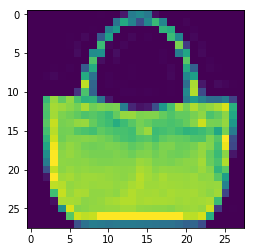

In [52]:
plt.imshow(x_train[100])

In [53]:
x_train[0].shape

(28, 28)

In [54]:
y_train[0]

9

In [55]:
y_train.shape

(60000,)

In [56]:
# from keras import backend as K

# K.clear_session()

# from numba import cuda
# cuda.select_device(0)
# cuda.close()